# Исследование объявлений о продаже квартир

## Обзор данных

In [1]:
import pandas as pd #импорт библиотеки pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
import seaborn as sns #импортируем библиотеку seaborn
sns.set(rc={'figure.figsize':(11.7,6.27)})
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
#чтение файла real_estate_data.csv и сохранение в переменной df
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head(10) # просмотр первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. Типы данных в столбцах: object, int64, bool и float64.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Названия столбцов, кроме `cityCenters_nearest`, корректные в соответствие с хорошим стилем, исправление названий не требуется. В названии `cityCenters_nearest` строчные буквы сочетаются с прописными - необходимо исправить.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Выводы

В каждой строке таблицы - данные об объявлении о продаже квартиры. Часть колонок рассказывает о параметрах квартиры: число комнат, площадь, число балконов, тип квартиры, высота потолков, этаж и этажность дома, цена квартиры. Другая часть - о местоположении квартиры: расстояние до центра, до аэропорта, до ближайшего парка, до ближайшего водоёма, число парков рядом, название населённого пункта. И в оставшихся столбцах - параметры самого объявления: дата публикации, сколько дней было размещено объявление, число фотографий в объявлении.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названии колонки `cityCenters_nearest` — расхождение с хорошим стилем.

Для более эффективной работы с данными и большей наглядности для проверки гипотез необходимо произвести их категоризицию по этажу квартиры.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Стиль заголовков

In [5]:
df.columns #выведем на экран названия столбцов таблицы

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
#переименуем столбец `cityCenters_nearest` таблицы в соответствие с правилами
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [7]:
df.columns #проверим успешность переименования

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Выводы**

На данном этапе мы проверили названия столбцов таблицы на правильность написания и исправили название столбца `cityCenters_nearest` в соответствие с хорошим стилем.

### Заполнение пропусков

Пропущенные значения присутствуют в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Проверим количество таких значений и что это за значения.

In [8]:
df.isna().mean() #информация о доле пропущенных значений в каждом из столбцов таблицы

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Для проверки гипотез нам не требуются данные из столбцов `is_apartment`, `balcony`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Предлагается оставить их как есть.

In [9]:
df[df['floors_total'].isna()].head() #информация о пропущенных значениях в столбце `floors_total`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Так как доля пропусков в столбце `floors_total` меньше 1% (0,36%) и при этом данный показатель важен нам для проверки гипотез, предлагается исключить из анализа данные с незаполненными строками.

In [10]:
#удаляем строки с пропусками в столбце `floors_total`
df = df.dropna(subset=['floors_total'])
len(df[df['floors_total'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `floors_total`

0

In [11]:
df[df['living_area'].isna()].head() #информация о пропущенных значениях в столбце `living_area`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Доля пропущенных значений в столбце `living_area` порядка 8%, в проверке гипотез данный столбец не учавствует, однако в соответствие с заданием необходимо рссчитать соотношение жилой и общей площади. Исходя из этого предлагается заменить пропущенные значения на медианными по количеству комнат в квартире.

In [12]:
df['living_area'].median()  #найдём медиану значений столбца `living_area` до заполнения пропусков

30.0

In [13]:
#заполняем пропущенные значения в столбце `living_area` медианой по количеству комнат
df['living_area'] =  df.living_area.fillna(df.groupby('rooms')['living_area'].transform('median'))
len(df[df['living_area'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `living_area`

0

In [14]:
df['living_area'].median()  #проверим влияние заполненных пропусков на медиану значений столбца `living_area`

30.3

Изменение медианы столбца `living_area` незначительное.

In [15]:
df[df['kitchen_area'].isna()].head() #информация о пропущенных значениях в столбце `kitchen_area`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,17.6,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,30.5,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,17.6,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,17.6,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Доля пропущенных значений в столбце `kitchen_area` порядка 9%, в проверке гипотез данный столбец не учавствует, однако в соответствие с заданием необходимо рссчитать отношение площади кухни к общей. Исходя из этого предлагается заменить пропущенные значения по аналогии со столбцом `living_area` - медианными по количеству комнат в квартире.

In [16]:
df['kitchen_area'].median()  #найдём медиану значений столбца `kitchen_area` до заполнения пропусков

9.1

In [17]:
#заполняем пропущенные значения в столбце `kitchen_area` медианой по количеству комнат
df['kitchen_area'] =  df.kitchen_area.fillna(df.groupby('rooms')['kitchen_area'].transform('median'))
len(df[df['kitchen_area'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `kitchen_area`

194

После замены пропусков осталось 194 ячейки с пропусками, посмотрим значения в строках с пропусками в столбце `kitchen_area`

In [18]:
df[df['kitchen_area'].isna()].head() #проверяем строки с пропусками в столбце `kitchen_area`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,18.00,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Очевидно пропуски в столбце `kitchen_area` не заполнились по строкам со значением в столбце `rooms` = 0. Проверим эту гипотезу.

In [19]:
#создадим временную переменную, в которой сохраним столбцы `kitchen_area` и `rooms`
temp = df[df['kitchen_area'].isna()]  
temp = temp[['rooms', 'kitchen_area']] #оставим только строки с пустыми значениями в столбце `kitchen_area`
temp.head()

,rooms,kitchen_area
144,0,NaN
349,0,NaN
440,0,NaN
508,0,NaN
608,0,NaN


In [20]:
temp['rooms'].unique()  #проверим какие есть значения в столбце `rooms`

array([0])

Гипотеза оказалась верной, в таком случае предлагается оставшиеся пустые значения в столбце `kitchen_area` также заполнить нулём.

In [21]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)  #заполняем пустые значения нулём
len(df[df['kitchen_area'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `kitchen_area`

0

In [22]:
df['kitchen_area'].median()  #найдём медиану значений столбца `kitchen_area` после заполнения пропусков

9.0

Изменение медианы столбца `kitchen_area` также незначительное.

In [23]:
df[df['ceiling_height'].isna()].head() #информация о пропущенных значениях в столбце `ceiling_height`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Доля пропущенных значений в столбце `ceiling_height` порядка 39%, при этом одна из гипотез, которую нам нужно 
проверить в ходе данного исследования, основана на этих данных. Предлагается заменить пропущенные значения медианой по количеству этажей в доме.

In [24]:
df['ceiling_height'].median() #посчитаем медиану по столбцу `ceiling_height` до заполнения пропусков

2.65

In [25]:
#заполняем пропущенные значения в столбце `ceiling_height` медианой по количеству этажей в доме
df['ceiling_height'] =  df.ceiling_height.fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))
len(df[df['ceiling_height'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `ceiling_height`

1

После замены пропусков остался 1 пропуск, посмотрим значения строки с пропуском в столбце `ceiling_height`

In [26]:
df[df['ceiling_height'].isna()]  #проверяем строки с пропусками в столбце `ceiling_height`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Проверим другие строки в датафрейме с количеством этажей = 33.

In [27]:
df.query('floors_total == 33')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Пустое значение в столбце `ceiling_height` не заполнилось медианой, так как в датафрейме всего одна строка с количеством этажей 33 и в ней в столбце `ceiling_height` пустое значение. Псомотрим значения столбца `ceiling_height` для домов с количеством этажей от 30 до 35 включительно.

In [28]:
#во временной переменной оставим только столбцы `floors_total` и `ceiling_height`
temp = df[['floors_total', 'ceiling_height']]
temp = temp.query('30 <= floors_total <= 35')
temp.head()

,floors_total,ceiling_height
871,35.0,2.70
1060,35.0,2.70
1697,34.0,2.65
1917,35.0,2.80
2966,35.0,2.70


In [29]:
temp['ceiling_height'].median()  #находим медиану `ceiling_height` для домов с количеством этажей от 30 до 35

2.7

In [30]:
df.loc[11575, 'ceiling_height'] = 2.7  #заполним пустое значение расчитанной медианой
df.query('floors_total == 33')  #проверим, что значение заполнилось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,2.7,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


In [31]:
len(df[df['ceiling_height'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `ceiling_height`

0

In [32]:
df['ceiling_height'].median()  #найдём медиану значений столбца `ceiling_height` после заполнения пропусков

2.65

Медиана по столбцу `ceiling_height` не изменилась.

In [33]:
df[df['locality_name'].isna()].head() #информация о пропущенных значениях в столбце `locality_name`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,3.00,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.75,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.75,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.55,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Доля пропущенных значений в столбце `locality_name` меньше 1% (0,2%) и при этом данный столбец важен нам для проверки гипотез, предлагается исключить из анализа данные с незаполненными значениями в столбце `locality_name`.

In [34]:
#удаляем строки с пропусками в столбце `locality_name`
df = df.dropna(subset=['locality_name'])
len(df[df['locality_name'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `locality_name`

0

In [35]:
df[df['airports_nearest'].isna()].head() #информация о пропущенных значениях в столбце `airports_nearest`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,NaN,...,9.00,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Доля пропущенных значений в столбце `airports_nearest` порядка 23% и при этом данный столбец важен нам для проверки гипотез. Разделим строки с пропусками в столбце `airports_nearest` на 2 группы: Санкт-Петербург и другие населённые пункты. Так как другие населённые пункты небольшие по площади относительно  Санкт-Петербурга, то для них пропуски предлагается заполнить медианой по названию населённого пункта.

In [36]:
#во временную переменную сохраним столбцы `locality_name` и `airports_nearest`
temp = df[df['airports_nearest'].isna()]
temp = temp[['locality_name', 'airports_nearest']] #оставим только строки с пустыми значениями в столбце `airports_nearest`
temp.head()

,locality_name,airports_nearest
5,городской посёлок Янино-1,NaN
8,посёлок Мурино,NaN
12,Сертолово,NaN
22,деревня Кудрово,NaN
30,Коммунар,NaN


In [37]:
#проверим сколько строк с пустыми значениями в столбце `airports_nearest` для Санкт-Петербурга
len(temp.query('locality_name == "Санкт-Петербург"'))

84

Отсюда можно сделать вывод, что большинство пропусков в столбце `airports_nearest` в населённых пунктах, отличных от Санкт-Петербурга.

In [38]:
len(df.query('locality_name == "Санкт-Петербург"')) #проверим бщее количество строк с данными по Санкт-Петербургу

15651

In [39]:
84 / 15651 #рассчитаем долю пропусков в столбце `airports_nearest` для Санкт-Петербурга

0.005367069196856431

Так как доля также меньше 1% (0,5%) и нет возможности проставить какое-то расчётное значение, так как площадь Санкт-Петербурга очень большая и заполнение медианой или средним приведёт к значительным искажениям в данных, предлагается оставить пропуски как есть, но для удобства работы с данными заменим их на служебное значение -1.

In [40]:
#сначала создадим дополнительый столбец с маркером пустых значений в столбце `airports_nearest`
df['airports_nearest_nan'] = df['airports_nearest']
#и заменим в нём пустые значения на -1
df['airports_nearest_nan'] = df['airports_nearest_nan'].fillna(-1)
len(df[df['airports_nearest_nan'].isna()]) #проверяем, что нет пропусков в столбце `airports_nearest_nan`

0

In [41]:
#заполняем пропущенные значения в столбце `airports_nearest` медианой по населённому пункту
df['airports_nearest'] = (df.airports_nearest
                          .fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
                         )
len(df[df['airports_nearest'].isna()]) #проверяем, что в датафрейме нет пропусков в столбце `airports_nearest`

5432

После замены пропусков в столбце `airports_nearest` осталось 5432 строк с пропусками, посмотрим их значения.

In [42]:
df[df['airports_nearest'].isna()].head()  #проверяем строки с пропусками в столбце `airports_nearest`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_nan
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,-1.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,-1.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,NaN,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,-1.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,-1.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,NaN,...,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,-1.0


По аналогии с кейсом заполнения пустых значений для высоты потолков проверим, что в данном случае пустые значения в столбце `airports_nearest` не заполнились, так как они отсутствуют в принципе для этих населённых пунктов.

In [43]:
#во временной переменной оставим столбцы `locality_name`, `airports_nearest` и `airports_nearest_nan`
temp = df[['locality_name', 'airports_nearest', 'airports_nearest_nan']]
temp.head()

,locality_name,airports_nearest,airports_nearest_nan
0,Санкт-Петербург,18863.0,18863.0
1,посёлок Шушары,12817.0,12817.0
2,Санкт-Петербург,21741.0,21741.0
3,Санкт-Петербург,28098.0,28098.0
4,Санкт-Петербург,31856.0,31856.0


In [44]:
#выберем из таблицы temp только строки с пропусками в `airports_nearest`
temp1 = temp[temp['airports_nearest'].isna()]
#сохраним в переменной `names` список названий населённых пунктов, для которых есть пропуски в `airports_nearest`
names = temp1['locality_name'].unique()

In [45]:
#оставим в `temp1` только населённые пункты, для которых есть пропуски
temp1 = temp.query('locality_name in @names')
temp1.head()

,locality_name,airports_nearest,airports_nearest_nan
5,городской посёлок Янино-1,NaN,-1.0
8,посёлок Мурино,NaN,-1.0
12,Сертолово,NaN,-1.0
22,деревня Кудрово,NaN,-1.0
30,Коммунар,NaN,-1.0


In [46]:
#сгруппируем значения из `airports_nearest_nan` по населённому пункту, отсортируем по убыванию и выведем первые 10 значенй
t = (
    temp1.groupby('locality_name')['airports_nearest_nan']
    .agg(['mean', 'count']).sort_values(by='count', ascending=False)
)
t.head(10)

,mean,count
locality_name,,
посёлок Мурино,-1.0,520
Всеволожск,-1.0,398
Гатчина,-1.0,307
деревня Кудрово,-1.0,299
Выборг,-1.0,237
Кудрово,-1.0,171
деревня Новое Девяткино,-1.0,143
Сертолово,-1.0,142
Кириши,-1.0,125


In [47]:
t['mean'].unique() #посмотрим уникальные значения в столбце среднее (`mean`)

array([-1.])

Из этого можно сделать вывод, что все значения в столбце `airports_nearest` для полученных населённых пунктов отсутствуют. Вероятно, произошла ошибка при выгрузке данных. 

In [48]:
t['count'].sum()  #всего пропущенных значений по данным населённым пунктам

5432

In [49]:
t.head().sum()  #сумма пропущенных значений для ТОП5 из списка

mean       -5.0
count    1761.0
dtype: float64

По итогам полученных результатов предлагается заполнить значения столбца `airports_nearest` для ТОП5 населённых пунктов (это порядка 30% пропущенных значений) на основании данных из Яндекс карт, по остальным населённым пунктам заменить пропуски служебным значением -1. Также по таблице видим наличие не явного дубликата в названиях населённых пунктов. Исправим "деревня Кудрово" на "Кудрово".

In [50]:
#заменим дублирующиеся значения названия Кудрово
df.loc[(df.locality_name == 'деревня Кудрово'), 'locality_name'] = 'Кудрово' 
df.query('locality_name == "деревня Кудрово"').head() #проверим, что замена выполнена

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_nan


In [51]:
#создадим словарь расстояний до аэропорта для ТОП5 населённых пунктов
dict_np = {'посёлок Мурино': 46000, 'Всеволожск': 46000, 'Гатчина': 33000, 'Выборг': 155000, 'Кудрово': 27000}

In [52]:
#заменим значения в `airports_nearest` для населённых пунктов из словаря
for key, value in dict_np.items():
    df.loc[(df.locality_name == key), 'airports_nearest'] = value
df.query('locality_name == "Всеволожск"').head() #проверим на примере Всеволжска

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_nan
112,14,2500000.0,33.3,2018-03-27T00:00:00,1,2.55,9.0,19.0,3,NaN,...,2.0,Всеволожск,46000.0,NaN,NaN,NaN,NaN,NaN,226.0,-1.0
198,7,2900000.0,35.0,2015-02-04T00:00:00,1,2.70,17.0,16.1,17,False,...,2.0,Всеволожск,46000.0,NaN,NaN,NaN,NaN,NaN,586.0,-1.0
215,17,3700000.0,67.0,2018-09-07T00:00:00,3,2.70,9.0,42.2,8,NaN,...,NaN,Всеволожск,46000.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
224,10,5650000.0,61.4,2016-03-09T00:00:00,2,2.70,16.0,34.0,8,NaN,...,0.0,Всеволожск,46000.0,NaN,NaN,NaN,NaN,NaN,361.0,-1.0
225,7,3350000.0,58.9,2017-04-05T00:00:00,2,2.60,5.0,31.5,3,NaN,...,1.0,Всеволожск,46000.0,NaN,NaN,NaN,NaN,NaN,113.0,-1.0


Оставшиеся пустые значения в столбце `airports_nearest` заменяем на -1.

In [53]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
len(df[df['airports_nearest'].isna()]) #проверяем, что нет пропусков в столбце `airports_nearest`

0

Вернем в столбец `airports_nearest` также -1 для Санкт-Петербурга вместо медианы из столбца `airports_nearest_nan`.

In [54]:
df.query('locality_name == "Санкт-Петербург" and airports_nearest_nan == -1').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_nan
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.60,10.0,17.6,6,NaN,...,NaN,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,...,2.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
604,11,9899000.0,101.0,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,...,NaN,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,1.0,Санкт-Петербург,26763.0,13355.0,1.0,735.0,0.0,NaN,112.0,-1.0
742,7,37000000.0,161.0,2016-05-22T00:00:00,3,2.55,9.0,84.0,8,NaN,...,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,402.0,-1.0


In [55]:
for index, row in df.iterrows():  #возвращаем -1 для Санкт-Петербурга вместо медианы
    if row['locality_name'] == 'Санкт-Петербург' and row['airports_nearest_nan'] == -1:
        df.loc[index, 'airports_nearest'] = -1
    else:
        continue
df.query('locality_name == "Санкт-Петербург" and airports_nearest_nan == -1').head() #проверяем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_nan
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.60,10.0,17.6,6,NaN,...,NaN,Санкт-Петербург,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,...,2.0,Санкт-Петербург,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
604,11,9899000.0,101.0,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,...,NaN,Санкт-Петербург,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,1.0,Санкт-Петербург,-1.0,13355.0,1.0,735.0,0.0,NaN,112.0,-1.0
742,7,37000000.0,161.0,2016-05-22T00:00:00,3,2.55,9.0,84.0,8,NaN,...,0.0,Санкт-Петербург,-1.0,NaN,NaN,NaN,NaN,NaN,402.0,-1.0


In [56]:
#убираем служебный столбец `airports_nearest_nan`
df = df.drop(['airports_nearest_nan'], axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [57]:
df[df['city_centers_nearest'].isna()].head() #информация о пропущенных значениях в столбце `city_centers_nearest`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,-1.0,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,46000.0,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,-1.0,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,Кудрово,27000.0,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,NaN,...,9.00,NaN,Коммунар,-1.0,NaN,NaN,NaN,NaN,NaN,63.0


Доля пропущенных значений в столбце `city_centers_nearest` порядка 23% и при этом данный столбец важен нам для проверки гипотез. Разделим строки с пропусками в столбце `city_centers_nearest` на 2 группы: Санкт-Петербург и другие населённые пункты.

In [58]:
#во временную переменную сохраним столбцы `locality_name` и `city_centers_nearest`
temp = df[df['city_centers_nearest'].isna()]
#оставим только строки с пустыми значениями в столбце `city_centers_nearest`
temp = temp[['locality_name', 'city_centers_nearest']] 
temp.head()

,locality_name,city_centers_nearest
5,городской посёлок Янино-1,NaN
8,посёлок Мурино,NaN
12,Сертолово,NaN
22,Кудрово,NaN
30,Коммунар,NaN


In [59]:
#заполним во временной таблице пустые значения -1
temp['city_centers_nearest'] = temp['city_centers_nearest'].fillna(-1)

In [60]:
#посчитаем количество пропусков по населённым пунктам
temp.groupby('locality_name').agg('count').sort_values(by='city_centers_nearest', ascending=False).head()

,city_centers_nearest
locality_name,
посёлок Мурино,520
Кудрово,470
Всеволожск,398
Гатчина,307
Выборг,237


In [61]:
#посчитаем количество пропусков для Санкт-Петербурга
temp[temp['locality_name'] == 'Санкт-Петербург'].sum()

locality_name           Санкт-ПетербургСанкт-ПетербургСанкт-ПетербургС...
city_centers_nearest                                                -60.0
dtype: object

Доля пропусков в столбце `city_centers_nearest` для Санкт-Петербурга незначительная, а для остальных населённых пунктов из описания данных не ясно речь идёт о расстоянии до центра населённого пункта или до центра Санкт-Петербурга. Так как возможности уточнить значение данных у нас нет, то предлагается в проверке гипотез исследовать влияние расстояния до центра только для Санкт-Петербурга. В таком случае пустые значенияв столбце `city_centers_nearest` можем заменить на служебное значение -1.

In [62]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-1)
df[df['city_centers_nearest'].isna()].head() #проверяем, что пустых значений в столбце `city_centers_nearest` не осталось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [63]:
df[df['days_exposition'].isna()].head()  #информация о пропущенных значениях в столбце `days_exposition`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24.0,30.5,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22.0,17.6,3,NaN,...,9.0,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Доля пропущенных значений в столбце `days_exposition` порядка 13%. Предоположительно, в данном столбце пустые значения для тех, объявлений, которые ещё не сняты с публикации.

In [64]:
max(df['first_day_exposition'])  #найдём крайнюю дату публикации объявлений

'2019-05-03T00:00:00'

In [65]:
df.query('first_day_exposition == "2019-05-03T00:00:00"').head()  #проверим объявления за эту дату

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2178,10,5100000.0,51.00,2019-05-03T00:00:00,1,2.55,9.0,15.00,2,NaN,...,25.00,NaN,Кудрово,27000.0,-1.0,NaN,NaN,NaN,NaN,NaN
3254,16,8800000.0,80.00,2019-05-03T00:00:00,3,2.80,17.0,31.00,15,NaN,...,27.00,2.0,Кудрово,27000.0,-1.0,NaN,NaN,NaN,NaN,NaN
4450,13,3500000.0,34.60,2019-05-03T00:00:00,1,2.50,5.0,19.40,3,NaN,...,7.30,2.0,Пушкин,13107.0,25261.0,1.0,361.0,0.0,NaN,NaN
5986,0,5000000.0,48.00,2019-05-03T00:00:00,3,2.50,9.0,45.00,2,NaN,...,9.50,NaN,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN
8170,4,3280000.0,38.19,2019-05-03T00:00:00,1,3.00,6.0,14.41,4,NaN,...,10.26,NaN,городской посёлок Новоселье,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN


Для всех этих объявлений в столбце `days_exposition` отсутствуют значения. Предлагается заменить данные значения на 0 и считать, что данные объявления ещё не сняты с публикации, соответственно мы не можем взять их в рассчёт при проверке гипотезы на влияние стоимости на срок продажи.

In [66]:
df['days_exposition'] = df['days_exposition'].fillna(0)
df[df['days_exposition'].isna()].head() #проверяем, что пустых значений в столбце `days_exposition` не осталось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [67]:
df.isna().mean() #проверим, что мы обработали все пропуски в необходимых для исследования столбцах

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.882877
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.486951
locality_name           0.000000
airports_nearest        0.000000
city_centers_nearest    0.000000
parks_around3000        0.233397
parks_nearest           0.659240
ponds_around3000        0.233397
ponds_nearest           0.616550
days_exposition         0.000000
dtype: float64

**Выводы**

На данном этапе мы обработали пропущенные значения в столбцах, необходимых для проверки гипотез:
* удалили из датафрейма строки с пропусками в столбце `floors_total`, так как доля таких строк менее 1%
* заменили пропущенные значения в столбце `living_area` медианами по количеству комнат в квартирах
* заменили пропущенные значения в столбце `kitchen_area` медианами по количеству комнат в квартирах, а в картирах с 0 комнат, заменили пропуски на 0
* заменили пропущенные значения в столбце `ceiling_height` медианами по количеству этажей в доме
* удалили из датафрейма строки с пропусками в столбце `locality_name`, так как доля таких строк менее 1%
* пропущенные значения в столбце `airports_nearest` для Санкт-Петербурга и населённых пунктов, для которых нет никаких данных (кроме ТОП5 по количеству записей в датафрейме) заменили на -1, для ТОП5 заменили на значения из Яндекс карт, для остальных -  заменили медианами по населённым пунктам
* пропущенные значения в столбце `city_centers_nearest` заменили на -1
* пропущенные значения в столбце `days_exposition` заменили на 0
* в остальных столбцах оставлены пропуски, так как их наличие не влияет на проверку гипотез

### Изменение типов данных

Выведем ещё раз общую информацию о датафрейме.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Значения в столбцах `last_price`, `city_centers_nearest`, `airports_nearest`, `floors_total`, `days_exposition` представлены в типе float64, однако данные будут гораздо читабельнее, если они будут представлены в типе int. 

In [69]:
#поменяем тип данных в вышеперечисленных столбцах на int
df['last_price'] = df['last_price'].astype('int')
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df.info()  #проверим, что тип данных изменился

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Выводы**

На данном этапе мы изменили тип данных в столбцах `last_price`, `city_centers_nearest`, `airports_nearest`, `floors_total`, `days_exposition` на целочисленный для улучшения наглядности данных и удобства работы.

## Расчёты и добавление результатов в таблицу

Для проверки гипотез расчиттаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* категории этажа квартиры (первый, последний, другой);
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Добавление в таблицу столбца с ценой квадратного метра

In [70]:
df['price_for_sqm'] = df['last_price'] / df['total_area']
df.head()  #проверим результат добавления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,NaN,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,0,120370.370370
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,82920.792079
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.60,14,45.0,9,NaN,...,0.0,Санкт-Петербург,28098,6800,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,NaN,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,100000.000000


### Добавление в таблицу дня недели, месяца и года публикации объявления

Переведём данные в столбце `first_day_exposition` в формат `datetime`.

In [71]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,NaN,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,0,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,...,0.0,Санкт-Петербург,28098,6800,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,NaN,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,100000.000000


Добавляем столбцы с днём недели, месяцем и годом публикации объявления.

In [72]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,18603,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,13933,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,...,6800,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018


### Добавление в таблицу категории этажа квартиры

Напишем функцию для категоризации значений столбца `floor`.

In [73]:
def floor_category(row):
    """
    Возваращает наименование категории этажа квартиры:
    - 'первый', если floor = 1;
    - 'последний', если floor = floors_total;
    - 'другой' любые другие значения floor.
    """
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

#проверяем работу функции
row_values = [9, 9]
row_columns = ['floor', 'floors_total']

row = pd.Series(data=row_values, index=row_columns) 
floor_category(row)

'последний'

In [74]:
df['floor_category'] = df.apply(floor_category, axis=1) #добавляем столбец с категорией этажа
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой


### Добавление в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

In [75]:
#добавляем столбец с отношением жилой площади к общей площади квартиры
df['share_liv_area'] = df['living_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,0.283019
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000


In [76]:
#добавляем столбец с отношением площади кухни к общей площади квартиры
df['share_kit_area'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,...,3.0,234.0,424,408176.100629,4,7,2015,другой,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


**Выводы**

С целью дальнейшей проверки гипотез на данном этапе мы рассчитали и добавили в таблицу столбцы:
* `price_for_sqm` - цена квадратного метра;
* `weekday` - день недели публикации объявления;
* `month` - месяц публикации объявления;
* `year` - год публикации объявления;
* `floor_category` - категории этажей квартиры (первый, последний, другой);
* `share_liv_area` - отношение жилой и общей площади квартиры;
* `share_kit_area` - отношение площади кухни к общей площади квартиры.

## Исследовательский анализ данных

### Исследование параметров: площадь, цена, число комнат, высота потолков

Для изучения параметров площадь, цена, число комнат и высота потолков построим гистограммы для каждого из них.

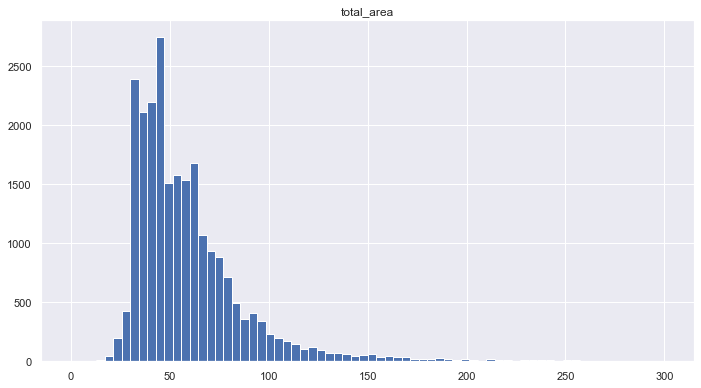

In [77]:
#построим гистограмму для параметра площадь квартиры, зададим число корзин = 70 и интервал построения = от 0 до 300
df.hist('total_area', bins=70, range=(0, 300))
plt.show()

Распределение частот площади квартир по форме близко к распределению Пуассона, что вполне логично, так как на рынке недвижимости всегда больше квартир с небольшой площадью, в нашем случае пик значений приходится на квартиры с площадью около 40 кв.м. Второй пик поменьше приходится на площадь около 70 кв.м.

In [78]:
# посмотрим общую информацию о данных по столбцу `total_area`
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Судя по макисмальному (900 кв.м.) и минимальному (12 кв.м.) значениям в данных присутствуют выбросы. Проверим это по диаграме боксплот.

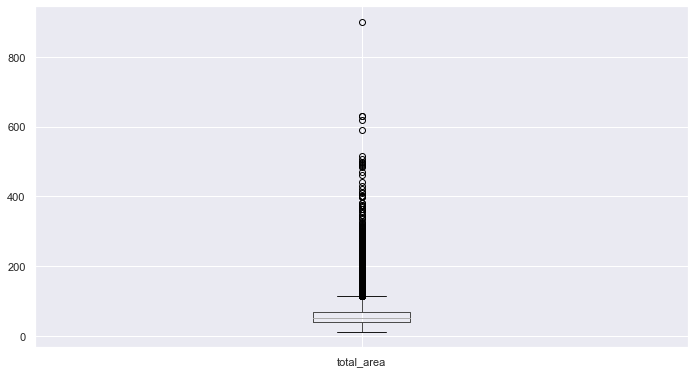

In [79]:
df.boxplot('total_area')
plt.show()

По данному графику видно, что значения площади квартир больше 114 кв.м (считаем как 3Q + 1,5IQR) являются выбросами. 

In [80]:
# Посмотрим данные по объявлениям с такими кватирами
df.query('total_area > 114').sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,2.0,318.0,106,466666.666667,2,12,2017,последний,0.455222,0.124444
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,NaN,...,2.0,210.0,0,221799.746515,1,4,2019,последний,0.510615,0.030894
3117,19,140000000,631.0,2019-03-30,7,2.55,5,145.0,5,NaN,...,2.0,210.0,0,221870.047544,5,3,2019,последний,0.229794,0.095087
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,NaN,...,2.0,198.0,111,485436.893204,0,12,2017,другой,0.417476,0.113269
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,...,0.0,NaN,14,110169.491525,3,2,2019,другой,0.693220,0.169492


In [81]:
df.query('total_area > 114').sort_values(by='total_area', ascending=False).shape

(1245, 29)

In [82]:
# доля объявлений с выбросами значений площади квартир
1245 / 23565

0.05283259070655633

Так как доля объявлий с выбросами не очень большая, предлагается удалить строки с данными значениями из анализа. Сформируем таблицу, очищенную от редких и выбивающихся значений. Создадим новую переменную `true_df`, в которой сохраним очищенные данные.

In [83]:
true_df = df.query('total_area < 114').reset_index(drop=True) #удалим старые индексы и сформируем новые
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
4,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342


In [84]:
# проверим, что мы удалили выбросы из столбца `total_area`
len(true_df.query('total_area > 114'))

0

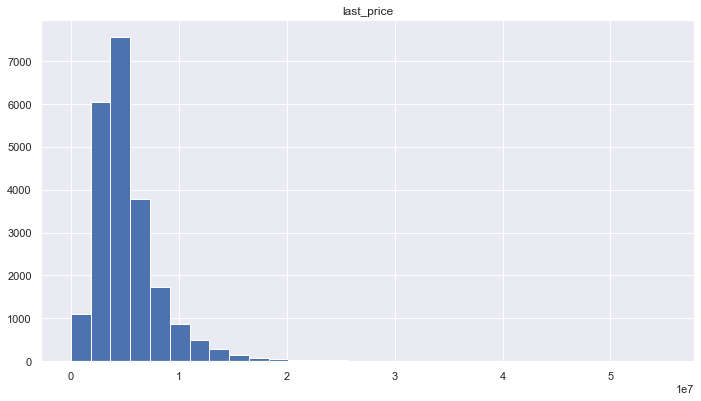

In [85]:
#построим гистограмму для параметра цена квартиры, зададим число корзин = 30 и интервал построения = от 0 до 55 млн.
true_df.hist('last_price', bins=30, range=(0, 55000000))
plt.show()

Распределение частот цен на квартиры также ближе к Пуассоновскому, пик частот на отметке порядка 4,5млн. руб.

In [86]:
# посмотрим общую информацию о данных по столбцу `last_price`
true_df['last_price'].describe()

count    2.229900e+04
mean     5.288466e+06
std      3.336649e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.300000e+06
max      5.300000e+07
Name: last_price, dtype: float64

Судя по макисмальному (53 млн.руб.) и минимальному (12 тыс.руб.) значениям в данных присутствуют выбросы. Проверим это по диаграме боксплот.

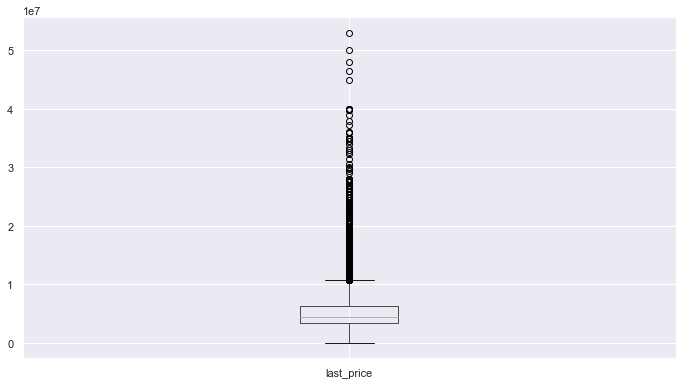

In [87]:
# Построим диаграму боксплот
true_df.boxplot('last_price')
plt.show()

По данному графику видно, что значения стоимости квартир больше 11 млн.руб. являются выбросами.

In [88]:
# Посмотрим данные по объявлениям с такими кватирами
true_df.query('last_price > 11000000').sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
9418,3,53000000,90.0,2019-03-21,3,3.15,5,73.0,3,NaN,...,3.0,564.0,40,588888.888889,3,3,2019,другой,0.811111,0.133333
7264,20,50000000,93.0,2019-04-18,2,3.00,7,40.0,4,NaN,...,3.0,569.0,0,537634.408602,3,4,2019,другой,0.430108,0.301075
6713,0,48000000,108.0,2018-02-01,3,2.55,5,61.0,2,NaN,...,3.0,415.0,144,444444.444444,3,2,2018,другой,0.564815,0.125000
10795,1,46424072,92.4,2014-12-09,2,3.00,6,54.8,6,True,...,3.0,569.0,1030,502425.021645,1,12,2014,последний,0.593074,0.216450
4974,19,45000000,96.0,2018-11-15,2,3.20,6,30.5,4,True,...,3.0,569.0,0,468750.000000,3,11,2018,другой,0.317708,0.468750


In [89]:
true_df.query('last_price > 11000000').sort_values(by='last_price', ascending=False).shape

(1158, 29)

In [90]:
# доля объявлений с выбросами значений стоимости квартир
1158 / 22299

0.051930579846629896

Так как доля объявлий с выбросами не очень большая, предлагается удалить строки с данными значениями из анализа.

In [91]:
true_df = true_df.query('last_price < 11000000').reset_index(drop=True) #удалим старые индексы и сформируем новые
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
1,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
3,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
4,6,3700000,37.3,2017-11-02,1,2.66,26,10.6,6,NaN,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059


In [92]:
# проверим, что мы удалили выбросы из столбца `total_area`
len(true_df.query('last_price > 11000000'))

0

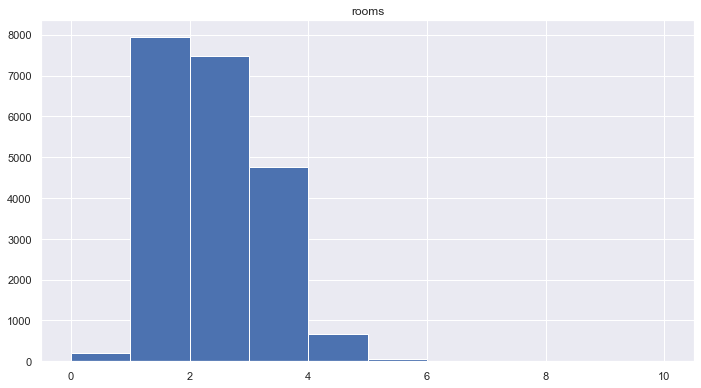

In [93]:
#построим гистограмму для параметра число квартиры, зададим число корзин = 10 и интервал построения = от 0 до 10.
true_df.hist('rooms', bins=10, range=(0, 10))
plt.show()

Распределение частот количества комнат квартир также ближе к Пуассоновскому, пик частот на отметке 1-2 комнаты. При этом мы и ранее при обработке данных на пропуски встречали объявления с количеством комнат 0, что не очень корректно. Скорее всего это либо ошибка пользователя при составлении объявления, либо ошибка данных, либо пользователи так отмечали квартиры студии. Последнее предположение можно проверить.

In [94]:
temp = true_df.query('rooms == 0') #выберем из таблицы все объявления с количеством комнат = 0
temp.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
128,1,2450000,27.00,2017-03-30,0,2.75,24,15.50,2,NaN,...,NaN,NaN,181,90740.740741,3,3,2017,другой,0.574074,0.0
309,4,2320000,25.00,2017-09-27,0,2.60,14,17.00,1,NaN,...,NaN,NaN,45,92800.000000,2,9,2017,первый,0.680000,0.0
392,8,2480000,27.11,2018-03-12,0,2.70,17,24.75,4,NaN,...,2.0,982.0,64,91479.158982,0,3,2018,другой,0.912947,0.0
449,0,3375000,34.40,2017-03-28,0,2.66,26,24.30,19,NaN,...,1.0,593.0,430,98110.465116,1,3,2017,другой,0.706395,0.0
538,2,1850000,25.00,2019-02-20,0,2.60,10,18.00,7,NaN,...,NaN,NaN,29,74000.000000,2,2,2019,другой,0.720000,0.0


In [95]:
# проверим значения в столбце `studio` для этой таблицы
temp['studio'].unique()

array([ True, False])

In [96]:
# проверим количество значений `True` в столбце `studio`
len(temp.query('studio == 1'))

134

Предположение не подтвердилось.

In [97]:
# посмотрим общую информацию о данных по столбцу `rooms`
true_df['rooms'].describe()

count    21100.000000
mean         1.902654
std          0.885342
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

В данном случае максимальное значение вполне реальное, проверим также выборосы на боксплоте.

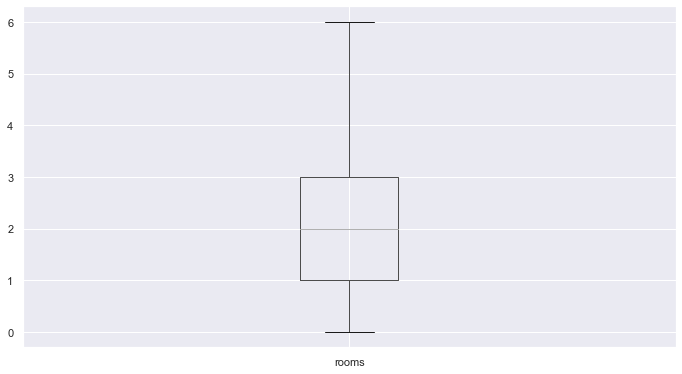

In [98]:
# Построим диаграму боксплот
true_df.boxplot('rooms')
plt.show()

Выбросов не обнаружено.

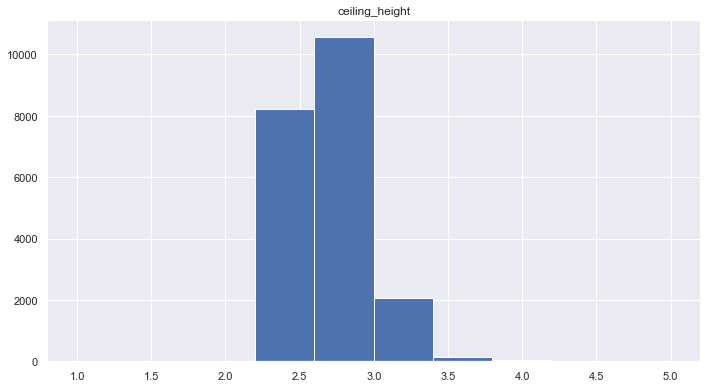

In [99]:
#построим гистограмму для параметра высота потолков, зададим число корзин = 10 и интервал построения = от 2 до 5м.
true_df.hist('ceiling_height', bins=10, range=(1, 5))
plt.show()

Распределение частот высоты потолков квартир также ближе к Пуассоновскому, пик частот на отметке порядка 2,7 метров.

In [100]:
# посмотрим общую информацию о данных по столбцу `ceiling_height`
true_df['ceiling_height'].describe()

count    21100.000000
mean         2.703874
std          0.799730
min          1.000000
25%          2.550000
50%          2.640000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

In [101]:
2.550 - (2.750 - 2.550)*1.5

2.2499999999999996

Судя по макисмальному (32 м) и минимальному (1 м) значениям в данных присутствуют выбросы. Проверим это по диаграме боксплот.

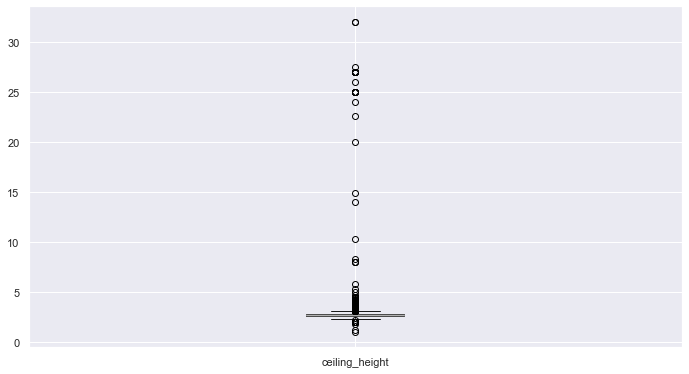

In [102]:
# Построим диаграму боксплот
true_df.boxplot('ceiling_height')
plt.show()

По данному графику видно, что значения высоты потолков квартир больше 3м (считаем как 3Q + 1,5IQR) и меньше 2,3м (считаем как 1Q - 1,5IQR) являются выбросами.

In [103]:
# Посмотрим данные по объявлениям с такими кватирами
true_df.query('ceiling_height < 2.3 or ceiling_height > 3').sort_values(by='ceiling_height', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
19882,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,3.0,511.0,0,108214.285714,4,4,2019,другой,0.600649,0.178571
2790,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,...,NaN,NaN,0,38666.666667,0,11,2018,другой,0.706667,0.106667
19034,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,0.0,NaN,61,116666.666667,1,4,2017,другой,0.897619,0.261905
4337,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,NaN,NaN,28,120000.000000,2,9,2017,другой,0.680000,0.000000
19433,20,2450000,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,NaN,NaN,0,55681.818182,1,2,2019,последний,0.863636,0.195455


In [104]:
true_df.query('ceiling_height < 2.3 or ceiling_height > 3').sort_values(by='ceiling_height', ascending=False).shape

(861, 29)

In [105]:
# доля объявлений с выбросами значений стоимости квартир
861 / 21100

0.04080568720379147

Так как доля объявлий с выбросами не очень большая, предлагается удалить строки с данными значениями из анализа.

In [106]:
true_df = true_df.query('2.3 < ceiling_height < 3').reset_index(drop=True) #удалим старые индексы и сформируем новые
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
1,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
2,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
3,6,3700000,37.3,2017-11-02,1,2.66,26,10.6,6,NaN,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059
4,5,7915000,71.6,2019-04-18,2,2.75,24,30.5,22,NaN,...,0.0,NaN,0,110544.692737,3,4,2019,другой,0.425978,0.263966


In [107]:
# проверим, что мы удалили выбросы из столбца `ceiling_height`
len(true_df.query('ceiling_height < 2.3 or ceiling_height > 3'))

0

### Исследование времени продажи квартиры

Для исследования времени продажи квартир построим боксплот и гистограмму.

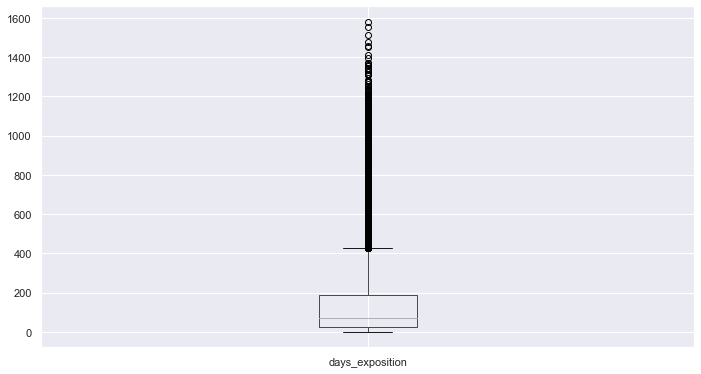

In [108]:
true_df.boxplot('days_exposition')
plt.show()

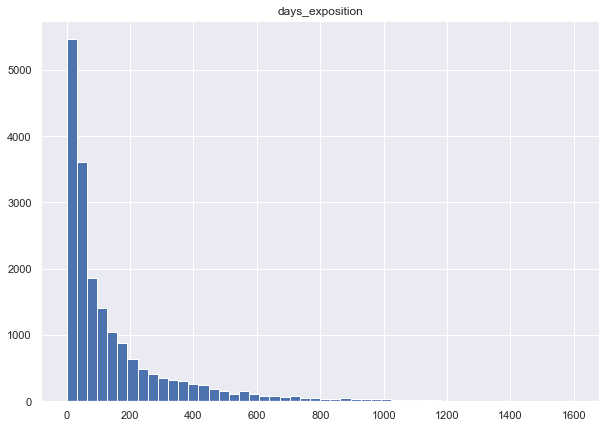

In [109]:
true_df.hist('days_exposition', bins=50, range=(0, 1600), figsize=(10,7))
plt.show()

По графикам видим, что:
1. есть большой всплеск в точке 0, который получился из-за замены пустых значений на 0, однако мы зафиксировали, что такие объявления в проверке гипотез, связанных со временем продажи кавртир, рассматривать некорректно, так как скорее всего, по ним просто нет срока продажи = квартиры ещё не проданы. Проверим сколько таких объявлений и построим графики без учёта данных объявлений;
2. по боксплоту видно, что очень много выбросов за пределами межквартильного размаха, их требуется проанализировать отдельно.

In [110]:
len(true_df.query('days_exposition == 0')) #рассчитаем количество значений в столбце `days_exposition` равное 0

2196

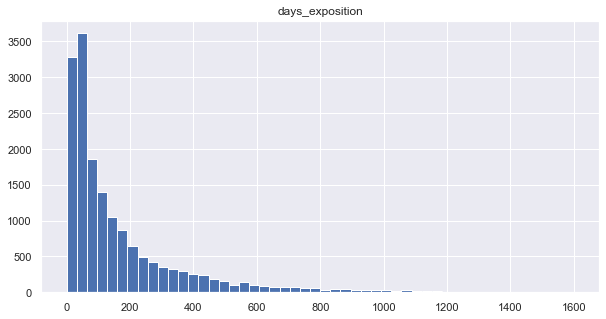

In [111]:
#построим гистограмму без учёта нулевых значений
true_df.query('days_exposition != 0').hist('days_exposition', bins=50, range=(0, 1600), figsize=(10,5))
plt.show()

Рассчитаем медиану и среднее по количеству дней на продажу.

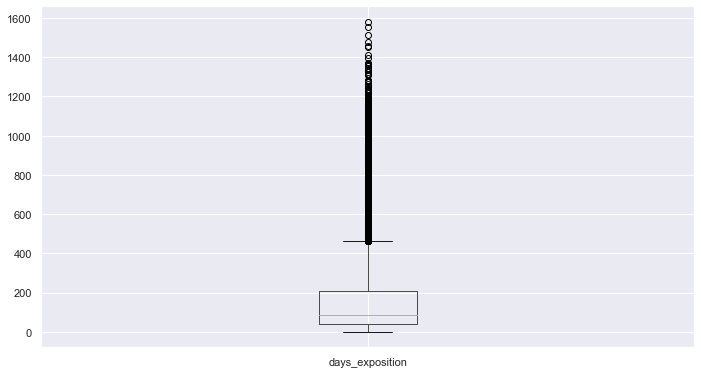

In [112]:
true_df.query('days_exposition != 0').boxplot('days_exposition')
plt.show()

In [113]:
# посмотрим общую информацию о данных по столбцу `days_exposition`
true_df.query('days_exposition != 0')['days_exposition'].describe()

count    16607.000000
mean       167.131330
std        205.757202
min          1.000000
25%         42.000000
50%         88.000000
75%        210.000000
max       1580.000000
Name: days_exposition, dtype: float64

Учитывая данные на графике боксплот, в таблице достаточно много выбросов, соответственно ориентироваться нужно ни на среднее, а на медиану. Таким образом, продажа квартиры обычно занимает порядка 88 дней. Также по боксплоту можно сделать вывод о том, что продажи прошли очень быстро, если квартиры проданы порядка за 42 дня и очень долго - порядка за 210 дней.

Значения времени продажи квартир больше 462 дня (считаем как 3Q + 1,5IQR) являются выбросами.

In [114]:
# Посмотрим данные по объявлениям с такими кватирами
true_df.query('days_exposition > 462').sort_values(by='days_exposition', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
14948,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,NaN,...,NaN,NaN,1580,72614.107884,0,12,2014,другой,0.568465,0.159751
7553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,NaN,...,0.0,NaN,1553,132500.000000,1,12,2014,другой,0.550000,0.187500
5290,3,4400000,42.98,2014-12-12,1,2.55,5,18.72,1,NaN,...,3.0,232.0,1512,102373.196836,4,12,2014,первый,0.435551,0.263146
3742,11,6650000,68.30,2015-02-19,4,2.63,5,45.10,4,NaN,...,3.0,453.0,1477,97364.568082,3,2,2015,другой,0.660322,0.131772
2310,3,10090000,71.90,2015-02-02,2,2.60,10,34.10,9,NaN,...,1.0,434.0,1458,140333.796940,0,2,2015,другой,0.474270,0.233658


In [115]:
true_df.query('days_exposition > 462').sort_values(by='days_exposition', ascending=False).shape

(1428, 29)

In [116]:
# доля объявлений с выбросами значений стоимости квартир
1428 / len(true_df['days_exposition'])

0.07594532787321172

Так как доля объявлий с выбросами не очень большая, предлагается удалить строки с данными значениями из анализа.

In [117]:
true_df = true_df.query('days_exposition < 462').reset_index(drop=True) #удалим старые индексы и сформируем новые
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,NaN,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059
3,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,NaN,...,0.0,NaN,0,110544.692737,3,4,2019,другой,0.425978,0.263966
4,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,NaN,...,NaN,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682


In [118]:
# проверим, что мы удалили выбросы из столбца `days_exposition`
len(true_df.query('days_exposition > 462'))

0

### Редкие и выбивающиеся значения

Также для проверки гипотез уберём строки с нулевым значением в столбце `days_exposition`.

In [119]:
true_df = true_df.query('days_exposition != 0').reset_index(drop=True) #удалим старые индексы и сформируем новые
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,NaN,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,NaN,...,NaN,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289,88524.590164,6,2,2017,другой,0.714754,0.106557


In [120]:
#проверим, что в новой таблице не осталось нулевых значений в столбце `days_exposition`
len(true_df.query('days_exposition == 0'))

0

Также уберём строки с нулевыми значениями в столбце `rooms`.

In [121]:
true_df = true_df.query('rooms != 0').reset_index(drop=True) #удалим старые индексы и сформируем новые
len(true_df.query('rooms == 0')) #проверим успешность операции

0

Также, для упрощения работы с данными предлагается убрать из финальной таблицы столбцы, которые не учавствуют в проверке гепотез: `is_apartment`, `balcony`, `studio`, `open_plan`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.

In [122]:
true_df = (
    true_df.drop(['is_apartment', 'balcony', 'studio', 'open_plan', 'parks_around3000', 
                  'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1)
)
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,airports_nearest,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,11.00,...,12817,18603,81,82920.792079,1,12,2018,первый,0.460396,0.272277
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,9.10,...,-1,-1,55,95065.789474,0,9,2018,другой,0.473684,0.299342
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,14.40,...,52996,19143,155,99195.710456,3,11,2017,другой,0.284182,0.386059
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,...,46000,-1,189,87454.764777,2,5,2018,другой,0.465320,0.265682
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,...,50898,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557


**Выводы**

На данном этапе мы проанализировали параметры: площадь, цена, число комнат, высота потолков, временя продажи квартиры, удалили редкие и выбивающиеся значения и сформировали итоговую таблицу для дальнейшей проверки гипотез.

## Проверка гипотез

### Площадь квартиры влияет на рыночную стоимость объектов недвижимости

Для оценки влияния площади квартиры на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

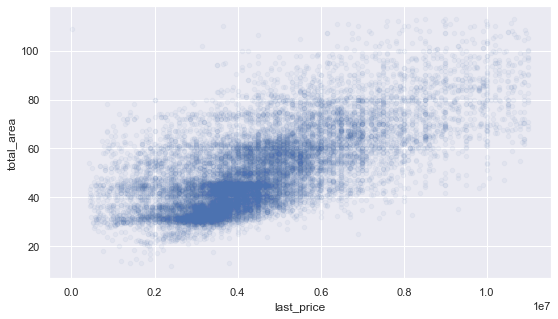

In [123]:
true_df.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.05, figsize=(9,5));

In [124]:
true_df['last_price'].corr(true_df['total_area']) #коэффициент корреляции = Коэффициент Пирсона

0.6706637913222842

**Выводы**

По графику мы видим, что для квартир с меньшей площадью меньше стоимость, коэффициент корелляции достаточно высокий. Гипотеза подтвердилась.

### Этаж квартиры влияет на рыночную стоимость объектов недвижимости

Для оценки влияния этажа квартиры на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

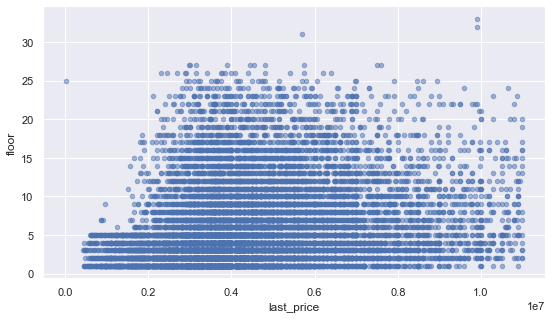

In [125]:
true_df.plot(x='last_price', y='floor', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

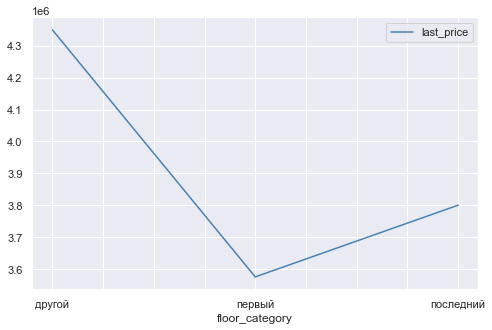

In [126]:
floor = true_df.pivot_table(index='floor_category',  values='last_price', aggfunc='median').reset_index()
floor.plot(figsize=(8, 5), x = 'floor_category', y = 'last_price',  color='steelblue', legend=True, grid=True);

Для оценки влияния этажа квартиры на стоимость рассчитаем коэффициент корреляции

In [127]:
true_df['last_price'].corr(true_df['floor'])

0.20480271882329643

In [128]:
#сделаем сводную таблицу по категориям этажей
true_df_group = true_df.groupby('floor_category')['last_price'].agg(['median', 'count']).reset_index()
true_df_group

,floor_category,median,count
0,другой,4350000.0,11336
1,первый,3575000.0,1778
2,последний,3800000.0,1901


In [129]:
true_df_group.columns = ['floor_category', 'price', 'count'] #переименуем столбцы
true_df_group

,floor_category,price,count
0,другой,4350000.0,11336
1,первый,3575000.0,1778
2,последний,3800000.0,1901


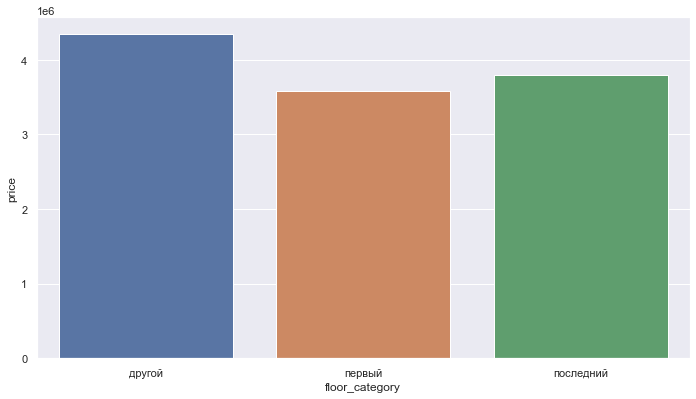

In [130]:
sns.barplot(x=true_df_group['floor_category'], y=true_df_group['price']);

**Выводы**

На основании полученных данных можно сделать вывод, что значительное влияние на стоимость оказывает то, что квартира находится на 1 этаже, такие квартиры стоят гораздо дешевле. Стоимость квартир на последнем этаже также несколько ниже, чем стоимость квартир в категории другие.
Гипотеза подтвердилась.

### Число комнат влияет на рыночную стоимость объектов недвижимости

Для оценки влияния числа комнат квартиры на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

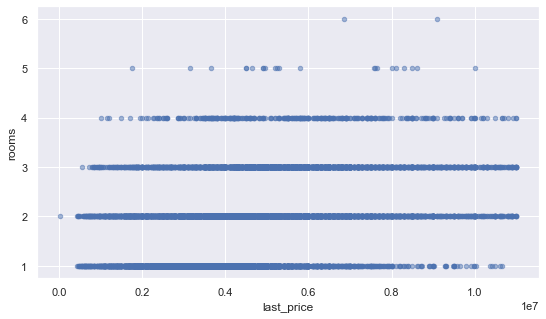

In [131]:
true_df.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

In [132]:
true_df['last_price'].corr(true_df['rooms']) #коэффициент корреляции

0.4078228101961943

In [133]:
#сделаем сводную таблицу по количеству комнат и стоимости квартиры
true_df.groupby('rooms')['last_price'].agg(['median', 'count']).head(10).reset_index()

,rooms,median,count
0,1,3550000.0,6198
1,2,4500000.0,5324
2,3,5400000.0,3091
3,4,5800000.0,378
4,5,5275000.0,22
5,6,7982000.0,2


In [134]:
#сделаем сводную таблицу по количеству комнат и цены квадратного метра
true_df.groupby('rooms')['price_for_sqm'].agg(['median', 'count']).head(10).reset_index()

,rooms,median,count
0,1,99358.974359,6198
1,2,89090.909091,5324
2,3,82524.271845,3091
3,4,77222.941836,378
4,5,73105.625718,22
5,6,77117.306780,2


**Выводы**

На основании полученных данных можно сделать вывод о том, что количество комнат влияет на стоимость квартира - чем меньше комнат, тем меньше стоимость квартиры, однако если мы посмотри влияние количества комнат на стоимость квадратного метра, то картина будет противоположной - чем меньше комнат в квартире, тем выше стоимость квадратного метра. Гипотеза подтвердилась.

### Высота потолков влияет на рыночную стоимость объектов недвижимости

Для оценки влияния высоты потолков квартиры на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

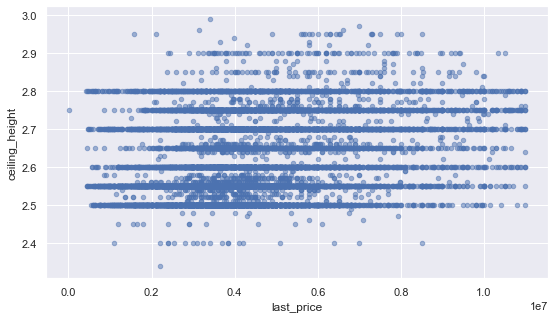

In [135]:
true_df.plot(x='last_price', y='ceiling_height', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

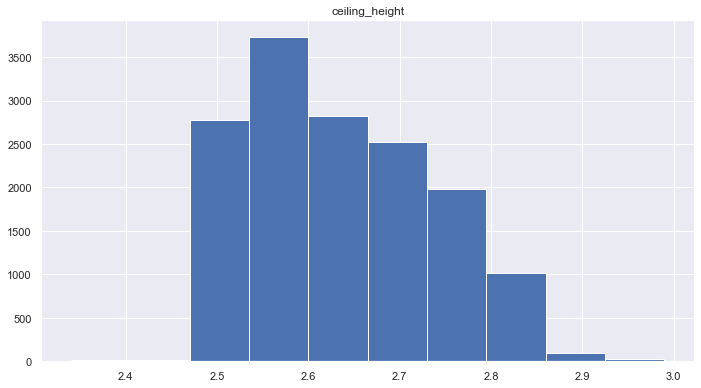

In [136]:
# посмотрим частотность значений высоты потолков
true_df.hist('ceiling_height');

Самое частое значение - 2.6 метра.

In [137]:
true_df['last_price'].corr(true_df['ceiling_height']) #коэффициент корреляции

0.27788440886264243

In [138]:
#сделаем сводную таблицу по высоте потолков и стоимости квартиры
true_df.groupby('ceiling_height')['last_price'].agg(['median', 'count']).head(10).reset_index()

,ceiling_height,median,count
0,2.34,2200000.0,1
1,2.40,3400000.0,19
2,2.45,2900000.0,11
3,2.46,6450000.0,2
4,2.47,6105000.0,2
5,2.48,4000000.0,7
6,2.49,6800000.0,1
7,2.50,3800000.0,2621
8,2.51,4075000.0,28
9,2.52,3775000.0,70


**Выводы**

Данная гипотеза не подтвердилась, высота потолка не влияет на стоимость квартиры.

### Удалённость от центра влияет на рыночную стоимость объектов недвижимости

Для оценки влияния параметра удалённости от центра на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции. Но перед этим нам необходимо убрать из таблицы значения с -1, которой мы заполнили пропуски по некоторым населённым пунктам (см. п.2.2).

In [139]:
#сохраним в переменной `true_df_center` только строки, в которых значение столбца `city_centers_nearest` не равно -1
true_df_center = true_df.query('city_centers_nearest != -1')
true_df_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,airports_nearest,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,11.0,...,12817,18603,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,6,3700000,37.3,2017-11-02,1,2.66,26,10.6,6,14.4,...,52996,19143,155,99195.710456,3,11,2017,другой,0.284182,0.386059
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,...,50898,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557
5,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,...,38357,13878,137,127525.252525,3,11,2017,другой,0.512626,0.214646
6,9,3300000,44.0,2018-08-27,2,2.55,5,31.0,4,6.0,...,48252,51677,7,75000.000000,0,8,2018,другой,0.704545,0.136364


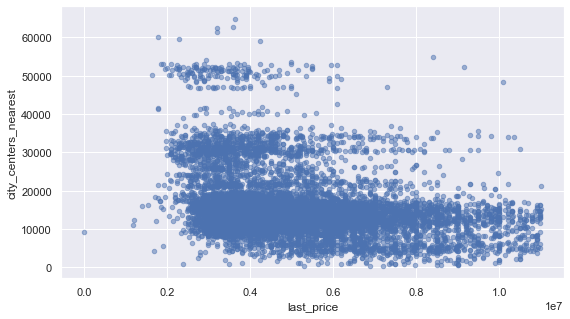

In [140]:
true_df_center.plot(x='last_price', y='city_centers_nearest', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

In [141]:
true_df_center['last_price'].corr(true_df['city_centers_nearest']) #коэффициент корреляции

-0.30023626716051593

**Выводы**

На основании полученных данных можно сделать вывод, что близость к центру оказывает значительное влияние на стоимость квартиры - чем ближе к центру, тем больше стоимость.

### Даты размещения объявлений: день недели, месяц и год, влияют на рыночную стоимость объектов недвижимости

Для оценки влияния дня недели размещения объявления на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

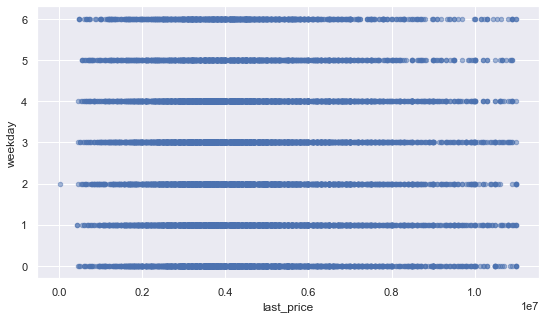

In [142]:
true_df.plot(x='last_price', y='weekday', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

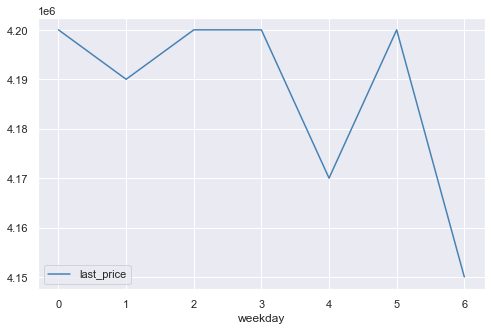

In [143]:
gr = true_df.pivot_table(index='weekday',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'weekday', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [144]:
true_df['last_price'].corr(true_df['weekday']) #коэффициент корреляции

-0.009303857165226909

In [145]:
#сделаем сводную таблицу по дню недели
true_df.groupby('weekday')['last_price'].agg(['median', 'count']).reset_index()

,weekday,median,count
0,0,4200000.0,2228
1,1,4190000.0,2641
2,2,4200000.0,2489
3,3,4200000.0,2692
4,4,4170000.0,2619
5,5,4200000.0,1237
6,6,4150000.0,1109


День недели размещения объявления никак не влияет на стоимость квартиры.

Для оценки влияния месяца размещения объявления на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

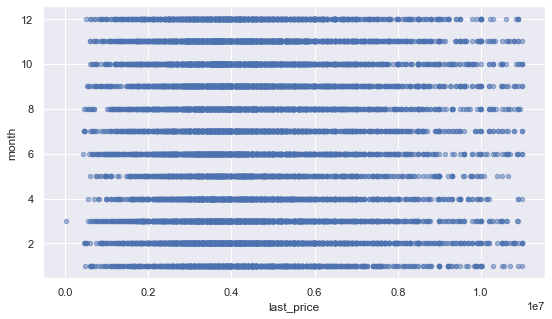

In [146]:
true_df.plot(x='last_price', y='month', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

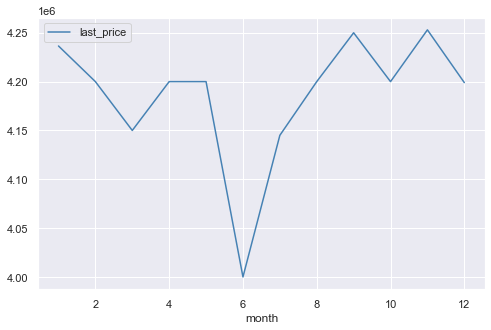

In [147]:
gr = true_df.pivot_table(index='month',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'month', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [148]:
true_df['last_price'].corr(true_df['month']) #коэффициент корреляции

0.010208902815458044

In [149]:
#сделаем сводную таблицу по месяцу размещения объявления
true_df.groupby('month')['last_price'].agg(['median', 'count']).reset_index()

,month,median,count
0,1,4236494.0,940
1,2,4200000.0,1707
2,3,4150000.0,1419
3,4,4200000.0,1088
4,5,4200000.0,791
5,6,4000000.0,1224
6,7,4145000.0,1138
7,8,4200000.0,1222
8,9,4250000.0,1370
9,10,4200000.0,1486


Месяц размещения объявления также почти не влияет на стоимость квартиры.

Для оценки влияния года размещения объявления на стоимость посторим диаграмму рассеяния и рассчитаем коээфициент кореляции.

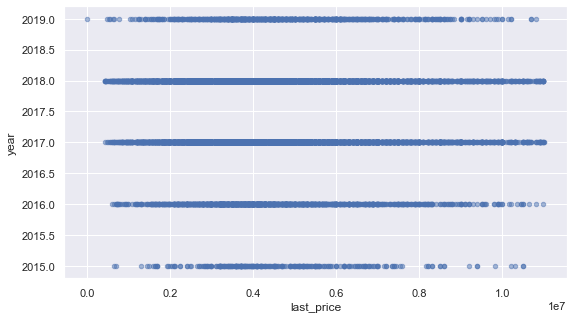

In [150]:
true_df.plot(x='last_price', y='year', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

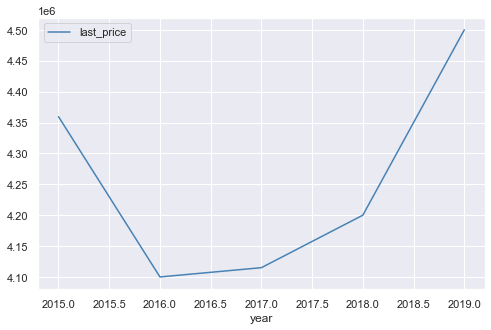

In [151]:
gr = true_df.pivot_table(index='year',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'year', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [152]:
true_df['last_price'].corr(true_df['year']) #коэффициент корреляции

0.017820009572781306

In [153]:
#сделаем сводную таблицу по месяцу размещения объявления
true_df.groupby('year')['last_price'].agg(['median', 'count']).reset_index()

,year,median,count
0,2015,4359500.0,290
1,2016,4100000.0,1557
2,2017,4115000.0,5998
3,2018,4200000.0,6259
4,2019,4500000.0,911


В отличие от дня и месяца размещения объявления, год размещения хоть и не сильно, но влияет на стоимость квартиры. По результатам исследования видим, что в 2015 и 2019 годях стоимость несколько выше (2014 год является непоказательным, так как данных за этот год достаточно мало).

**Выводы**

Гипотеза о влиянии даты размещения объявления на стоимость квартиры подтвердилась отчасти - день и месяц размещения никак не влияют на стоимость, однако, год размещения имеет небольшое влияние (квартиры с датой размещения в 2015 и 2019 годах стоят немного дороже, чем квартиры с датой размещения в другие годы).

### Количество объявлений в населённом пункте влияет на стоимость объектов недвижимости

Выберем 10 населённых пунктов с наибольшим числом объявлений и сохраним их в переменной `true_df_max_ad`. Для этого сначала создадим сводную таблицу с количеством объявлений по населённым пунктам и отсортируем по убыванию.

In [154]:
true_df.groupby('locality_name')['total_area'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      9437
посёлок Мурино        447
Кудрово               375
посёлок Шушары        356
посёлок Парголово     277
Всеволожск            273
Колпино               260
Гатчина               213
Пушкин                204
Выборг                159
Name: total_area, dtype: int64

Сохраним в список `names_ad` названия ТОП10 населённых пунктов по количеству объявлений.

In [155]:
names_ad = (
    ['Санкт-Петербург', 'посёлок Мурино', 'Кудрово', 'посёлок Шушары', 'Всеволожск', 'Колпино', 
     'Пушкин', 'посёлок Парголово', 'Гатчина', 'Выборг']
)

In [156]:
#сохраним в переменную `true_df_max_ad` строки с выбранными населёнными пунктами
true_df_max_ad = true_df.query('locality_name in @names_ad')
true_df_max_ad.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,airports_nearest,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,11.00,...,12817,18603,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,14.40,...,52996,19143,155,99195.710456,3,11,2017,другой,0.284182,0.386059
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,...,46000,-1,189,87454.764777,2,5,2018,другой,0.465320,0.265682
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,...,50898,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557
5,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,8.50,...,38357,13878,137,127525.252525,3,11,2017,другой,0.512626,0.214646


In [157]:
true_df_max_ad['locality_name'].unique()  #проверим успешность операции

array(['посёлок Шушары', 'посёлок Парголово', 'посёлок Мурино',
       'Санкт-Петербург', 'Кудрово', 'Пушкин', 'Колпино', 'Гатчина',
       'Выборг', 'Всеволожск'], dtype=object)

In [158]:
(
    true_df_max_ad.groupby('locality_name')['price_for_sqm']
    .agg(['median', 'count']).sort_values(by='median', ascending=False)
)

,median,count
locality_name,,
Санкт-Петербург,100000.000000,9437
Пушкин,97237.990341,204
Кудрово,94507.531866,375
посёлок Парголово,91250.000000,277
посёлок Мурино,84876.543210,447
посёлок Шушары,75649.705507,356
Колпино,73820.928519,260
Гатчина,66666.666667,213
Всеволожск,65454.545455,273


**Выводы**

Количество объявлений в населённом пункте не влияет на стоимость объектов недвижимости.

### Населённый пункт квартиры влияет на рыночную стоимость объектов недвижимости

Сгруппируем по населённому пункту значения медиан стоимости жилья.

In [159]:
true_df_location = true_df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).reset_index()
display(true_df_location.head())
true_df_location.tail()

,locality_name,last_price
0,посёлок Лисий Нос,7.305000e+06
1,деревня Юкки,5.725000e+06
2,Сестрорецк,5.431170e+06
3,Санкт-Петербург,5.209808e+06
4,посёлок Репино,5.100000e+06


,locality_name,last_price
301,посёлок станции Свирь,575000.0
302,поселок Совхозный,517500.0
303,деревня Бор,500000.0
304,деревня Старополье,460000.0
305,деревня Вахнова Кара,450000.0


**Выводы**

Гипотеза подтвердилась, стоимость завист от населённого пункта. ТОП5 населённых пунков с самой высокой стоимостю жилья: посёлок Лисий Нос, деревня Юкки, Сестрорецк, Санкт-Петербург и посёлок Репино; ТОП5 с самой низкой - посёлок станции Свирь, поселок Совхозный, деревня Бор, деревня Старополье и деревня Вахнова Кара.

### Для квартир из Санкт-Петербурга каждый километр удалённости от центра влияет на рыночную стоимость объектов недвижимости

Создадим отдельный столбец `city_centers_nearest_km` с расстоянием до центра в километрах и округлим до целых значений.

In [160]:
true_df['city_centers_nearest_km'] = true_df['city_centers_nearest'] / 1000
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area,city_centers_nearest_km
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,11.00,...,18603,81,82920.792079,1,12,2018,первый,0.460396,0.272277,18.603
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,9.10,...,-1,55,95065.789474,0,9,2018,другой,0.473684,0.299342,-0.001
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,14.40,...,19143,155,99195.710456,3,11,2017,другой,0.284182,0.386059,19.143
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,...,-1,189,87454.764777,2,5,2018,другой,0.465320,0.265682,-0.001
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,...,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557,15.008


In [161]:
true_df['city_centers_nearest_km'] = true_df['city_centers_nearest_km'].astype('int')
true_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area,city_centers_nearest_km
0,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,11.00,...,18603,81,82920.792079,1,12,2018,первый,0.460396,0.272277,18
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,9.10,...,-1,55,95065.789474,0,9,2018,другой,0.473684,0.299342,0
2,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,14.40,...,19143,155,99195.710456,3,11,2017,другой,0.284182,0.386059,19
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,8.81,...,-1,189,87454.764777,2,5,2018,другой,0.465320,0.265682,0
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,...,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557,15


Сохраним все объявления Санкт-Петербурга в отдельную переменную `true_df_spb`.

In [162]:
true_df_spb = true_df.query('locality_name == "Санкт-Петербург" and city_centers_nearest != -1')
true_df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area,city_centers_nearest_km
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,...,15008,289,88524.590164,6,2,2017,другой,0.714754,0.106557,15
5,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,...,13878,137,127525.252525,3,11,2017,другой,0.512626,0.214646,13
9,16,4650000,39.0,2017-11-18,1,2.60,14,20.5,5,7.6,...,14259,19,119230.769231,5,11,2017,другой,0.525641,0.194872,14
10,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,5.6,...,10842,168,104838.709677,4,1,2017,другой,0.625806,0.180645,10
12,13,3200000,31.6,2018-03-14,1,2.55,5,16.9,2,5.7,...,9722,310,101265.822785,2,3,2018,другой,0.534810,0.180380,9


Посчитаем среднюю цену для каждого километра и построим график, который показывает, как цена зависит от удалённости от центра. Граница центральная зоны будет там, где график сильно меняется.

In [163]:
true_df_spb.groupby('city_centers_nearest_km')['last_price'].median().reset_index().head()

,city_centers_nearest_km,last_price
0,0,7499500.0
1,1,7400000.0
2,2,7500000.0
3,3,6690000.0
4,4,6937500.0


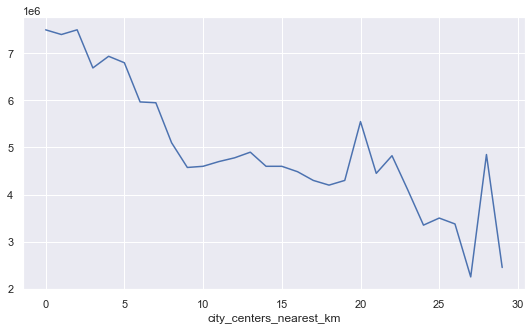

In [164]:
true_df_spb.groupby('city_centers_nearest_km')['last_price'].median().plot(figsize=(9,5));

**Выводы**

Гипотеза подтвердилась для расстояния от центра до 18км. В этих пределах для квартир из Санкт-Петербурга каждый километр удалённости от центра влияет на рыночную стоимость объектов недвижимости - чем ближе к центру, тем больше стоимость. Судя по графику центральной зоной считаются квартиры в радиусе 9км от центра.

### Сегмент квартир в центре Санкт-Петербурга не отличается по влиянию факторов на стоимость от других районов

Сохраним все объявления Санкт-Петербурга центрального района в отдельную переменную `true_df_spb_centre`.

In [165]:
true_df_spb_centre = true_df_spb.query('city_centers_nearest_km <= 10')
true_df_spb_centre.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,city_centers_nearest,days_exposition,price_for_sqm,weekday,month,year,floor_category,share_liv_area,share_kit_area,city_centers_nearest_km
10,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,5.6,...,10842,168,104838.709677,4,1,2017,другой,0.625806,0.180645,10
12,13,3200000,31.6,2018-03-14,1,2.55,5,16.9,2,5.7,...,9722,310,101265.822785,2,3,2018,другой,0.534810,0.180380,9
14,8,6500000,97.2,2015-10-31,2,2.80,3,46.5,1,19.6,...,2336,265,66872.427984,5,10,2015,первый,0.478395,0.201646,2
16,6,4050000,60.0,2017-04-28,4,2.55,5,43.0,4,7.0,...,10510,265,67500.000000,4,4,2017,другой,0.716667,0.116667,10
36,14,4350000,41.0,2016-03-28,1,2.80,7,18.1,4,11.1,...,9626,152,106097.560976,0,3,2016,другой,0.441463,0.270732,9


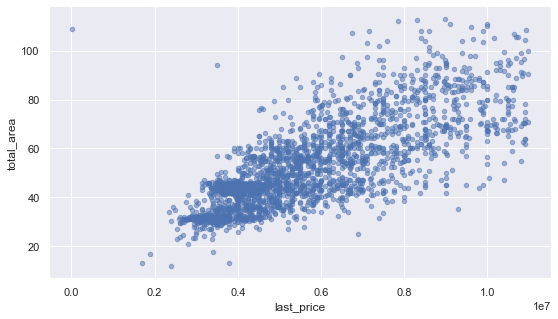

In [166]:
#влияния площади квартиры на стоимость
true_df_spb_centre.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

In [167]:
true_df_spb_centre['last_price'].corr(true_df['total_area']) #коэффициент корреляции

0.7611739174230447

Сегмент квартир в центре Санкт-Петербурга не отличается по влиянию площади квартиры на стоимость от других районов

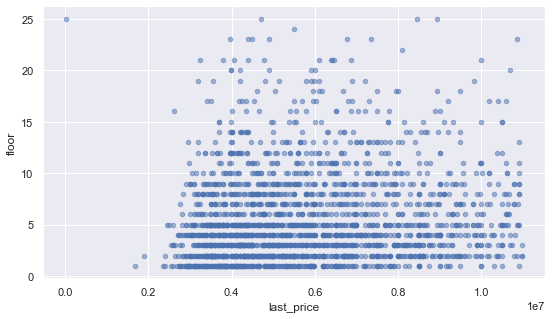

In [168]:
#влияния этажа квартиры на стоимость
true_df_spb_centre.plot(x='last_price', y='floor', kind='scatter', grid=True, alpha=0.5, figsize=(9,5));

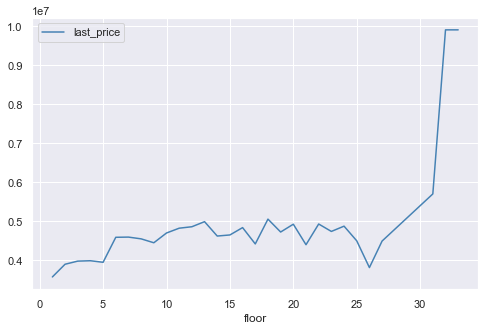

In [169]:
gr = true_df.pivot_table(index='floor',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'floor', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [170]:
true_df_spb_centre['last_price'].corr(true_df['floor']) #коэффициент корреляции

0.11577613980899198

In [171]:
true_df_spb_centre.groupby('floor_category')['last_price'].agg(['median', 'count']).reset_index()

,floor_category,median,count
0,другой,5550000.0,1718
1,первый,4600000.0,260
2,последний,5125000.0,314


Сегмент квартир в центре Санкт-Петербурга несколько отличается по влиянию этажа квартиры на стоимость от других районов - стоимость квартир на последнем этаже в центре Санкт-Петербурга немного выше, чем квартиры на других этажах.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

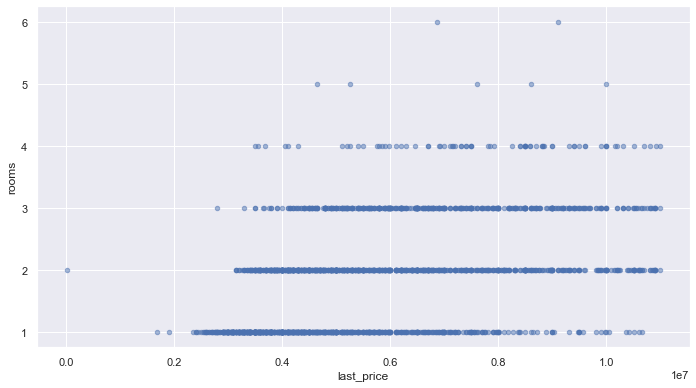

In [172]:
#влияния числа комнат квартиры на стоимость
true_df_spb_centre.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.5)

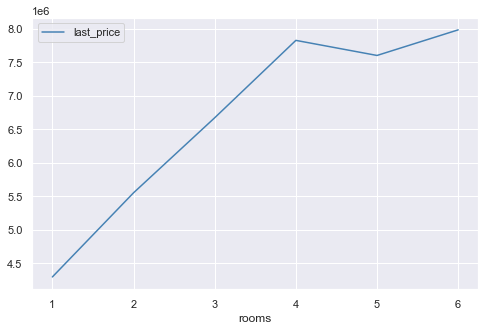

In [173]:
gr = true_df_spb_centre.pivot_table(index='rooms',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'rooms', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [174]:
true_df_spb_centre['last_price'].corr(true_df['rooms']) #коэффициент корреляции

0.4482800696782147

In [175]:
#сделаем сводную таблицу по количеству комнат и стоимости квартиры
true_df_spb_centre.groupby('rooms')['last_price'].agg(['median', 'count']).reset_index()

,rooms,median,count
0,1,4294500.0,854
1,2,5550000.0,877
2,3,6670000.0,480
3,4,7825000.0,74
4,5,7600000.0,5
5,6,7982000.0,2


In [176]:
#сделаем сводную таблицу по количеству комнат и цены квадратного метра
true_df_spb_centre.groupby('rooms')['price_for_sqm'].agg(['median', 'count']).reset_index()

,rooms,median,count
0,1,119039.938556,854
1,2,105263.157895,877
2,3,96419.699680,480
3,4,89881.426863,74
4,5,78358.208955,5
5,6,77117.306780,2


Сегмент квартир в центре Санкт-Петербурга не отличается по влиянию количества комнат квартиры на стоимость от других районов

<AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>

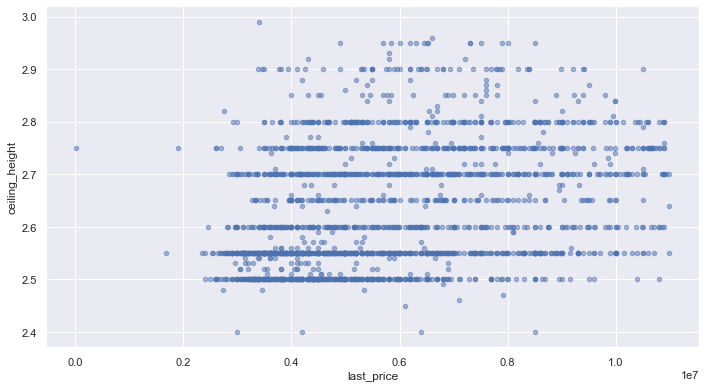

In [177]:
#влияния высоты потолков квартиры на стоимость
(
    true_df_spb_centre.query('1.7 <= ceiling_height <= 4')
    .plot(x='last_price', y='ceiling_height', kind='scatter', grid=True, alpha=0.5)
)

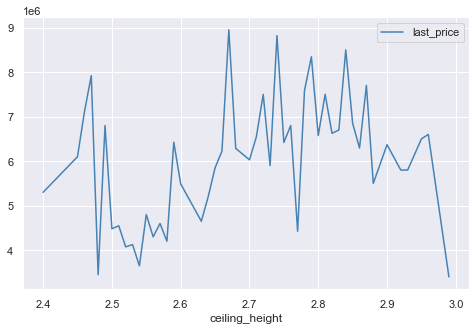

In [178]:
gr = true_df_spb_centre.query('1.7 <= ceiling_height <= 4').pivot_table(index='ceiling_height',  values='last_price', aggfunc='median').reset_index()
gr.plot(figsize=(8, 5), x = 'ceiling_height', y = 'last_price',  color='steelblue', legend=True, grid=True);

In [179]:
true_df_spb_centre['last_price'].corr(true_df['ceiling_height']) #коэффициент корреляции

0.3284661548266081

Сегмент квартир в центре Санкт-Петербурга не отличается по влиянию высоты потолков квартиры на стоимость от других районов

In [180]:
#для оценки влияния даты размещения объявлений на стоимость выделим необходимые столбцы в отдельную таблтцу
true_df_spb_centre_dates = true_df_spb_centre[['last_price', 'weekday', 'month', 'year']]
true_df_spb_centre_dates.head()

,last_price,weekday,month,year
10,3250000,4,1,2017
12,3200000,2,3,2018
14,6500000,5,10,2015
16,4050000,4,4,2017
36,4350000,0,3,2016


In [181]:
true_df_spb_centre_dates.corr() #рассчитаем коэффициенты корреляции для дня недели, месяца и года объявлений

,last_price,weekday,month,year
last_price,1.000000,0.011768,0.030050,0.019745
weekday,0.011768,1.000000,0.016562,0.037241
month,0.030050,0.016562,1.000000,-0.273102
year,0.019745,0.037241,-0.273102,1.000000


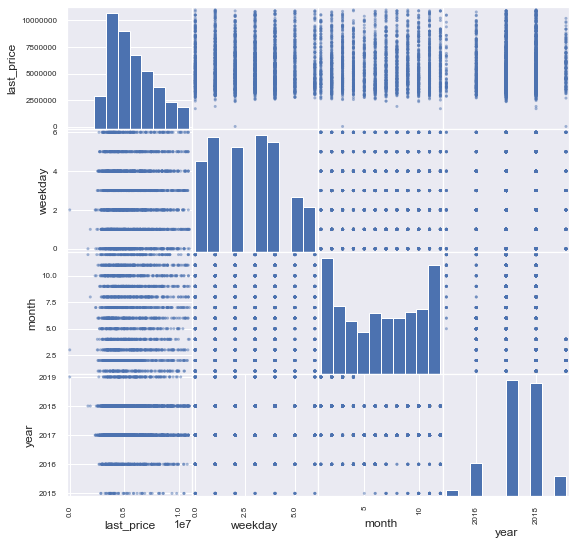

In [182]:
#построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(true_df_spb_centre_dates, figsize=(9, 9));

In [183]:
#сделаем сводную таблицу по месяцу размещения объявления
true_df_spb_centre_dates.groupby('year')['last_price'].agg(['median', 'count']).reset_index()

,year,median,count
0,2015,4945000.0,52
1,2016,5220000.0,264
2,2017,5475000.0,922
3,2018,5300000.0,897
4,2019,5500000.0,157


Сегмент квартир в центре Санкт-Петербурга несильно отличается по влиянию даты размещения объявлений о продаже квартиры на стоимость от других районов, видим небольшое отличие по году - в данном случае стоимость несколько ниже за 2017 и 2018 года.

**Выводы**

По большинству факторов Сегмент квартир в центре Санкт-Петербурга не отличается от других районов, однако стоит отметить, что есть небольшие отличия по факторам этаж квартиры и дата размещения объявления:
* в отличие от других районов последний этаж в центре Санкт-Петербурга стоит даже несколько дороже, чем квартиры на других этажах;
* также отличается стоимость квартир по годам - для центра Санкт-Петербурга стоимость ниже в 2017 и 2018 годах, когда как по общим данным стоимость ниже 2016 - 2018 гг.

## Общий вывод

По результатам исследования можно сделать следующий вывод: на стоимость объектов недвижимости наибольшее влияние оказывают следующие факторы - площадь квартиры, этаж, число комнат, удалённость от центра, год размещения объявления.

При этом, важно отметить, что для квартир сегмента центр Санкт-Петербурга факторы этажа и года размещения объявления отличаются от общих данных.

Остальные факторы - высота потолков, день и месяц размещения объявления, количество объявлений на населённый пункт, никак не влияют на стоимость объектов недвижимости.